In [2]:
import itertools
import random
import json
import matplotlib.pyplot as plt
import pandas
from pathlib import Path 
import math

In [5]:
###############################################
################# reading data #################
###############################################

PATH = '/home/leonardo/Desktop/PFE/Data/'
#PATH = Path("/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data/requested_data_on_authors.json")

# d = dictionary
# keys k are Id of authors (the data has not been consolidated)
# d[k]  is a dictionary, the keys y are 1990 ... 2018.
# note that len(d[k])=29 for all k
# d[k][y] is the number of publications of author k in year y.
d = json.load(open(Path(PATH+'requested_data_on_authors.json')))

#################### READING OF ANR coordinator #####################
ANR_ids = set()
dANR = pandas.read_csv(r'/home/leonardo/Desktop/PFE/Data/focal_controls.csv').to_dict()
for i in range(len(dANR['Unnamed: 0'])):
    if dANR['focal'][i] == 1:
        ANR_ids.add(dANR['auth.id'][i])
####### normally, there should be 6807
####
print('number of ANR people = {}'.format(len(ANR_ids)))
######################################################################

number of ANR people = 6807


In [6]:
###############################################
################# initialization of variables #################
###############################################

totalNbrAuthors =  len(d)
# 2207657

# In what follows, "StillAlive" means authors who have published in 2018.
totalNbrAuthorsStillAlive =0

# refinedStat[longev][year] contains a list [nbr,listStat] where nbr = the number of authors is this category, i.e., for who the longevity (difference between last and first year of publication +1) equals longev, and who published for the first time in year "year". Moreover, listStat is a list of length "longev" such that listStat[i] is the number of publications (total among all authors of this category) that they published during their (i+1)th year of activity.
refinedStat = dict()
# same but only for authors with an ANR
refinedStatANR = dict()

count = 0

nbrAuthorsWithMoreThanOneYearOfPubli =0
nbrAuthorsWithOneSingleYearOfPubliStillAlive =0
# number of years between the first year and the last year of publication
averageLongevity = 0
averageLongevityStillAlive = 0
averageLongevityANR = 0
# max number of consecutive years with publications
averageContinuity = 0
averageContinuityStillAlive = 0
averageContinuityANR = 0

distribNbrPublicationPerAuthors = dict()
distribNbrPublicationPerAuthorsStillAlive = dict()
distribNbrPublicationPerAuthorsANR = dict()

maxNbrPublis =0
maxNbrPublisStillAlive = 0
maxNbrPublisANR =0

publiPerYear = dict()
authorPerYear = dict()
newAuthorPerYear = dict()

In [7]:
###############################################
################# main function #################
###############################################

# test
countANRIdFound = 0
#/test

for k in d:
    count +=1
    #if (count % 100000) == 0:
    #    print(count)
    trajectory = d[k]
    #print(trajectory)
    startYear = 1990
    finalYear = 1990
    continueInit = True
    
    continueNewAuthor = True
    
    maxContinuity =0
    currentContinuity =0
    
    for i in range(1990,2019):
        if trajectory[str(i)]>0:
            if continueInit:
                startYear = i
                continueInit = False
            finalYear=i
            currentContinuity +=1
            if currentContinuity> maxContinuity:
                maxContinuity = currentContinuity
            
            if continueNewAuthor:
                continueNewAuthor = False
                if i in newAuthorPerYear.keys():
                    newAuthorPerYear[i] += 1
                else:
                    newAuthorPerYear[i] = 1
            
            if i in publiPerYear.keys():
                publiPerYear[i] += trajectory[str(i)]
                authorPerYear[i] += 1
            else:
                publiPerYear[i] = trajectory[str(i)]
                authorPerYear[i] = 1
        else:
            currentContinuity= 0

            

    longevite = finalYear - startYear +1
 
    ###############################################
    ################# main stat #################
    ###############################################

    if not(longevite in refinedStat.keys()):
        refinedStat[longevite] = dict()
    if not(startYear in refinedStat[longevite].keys()):
        refinedStat[longevite][startYear] = [0,[0 for i in range(longevite)]]
    refinedStat[longevite][startYear][0] +=1
    for i in range(longevite):
            refinedStat[longevite][startYear][1][i] += d[k][str(startYear+i)]
    
    ############# SOME DATA ANALYSIS / REMARK ############
# Note that we have data from 1990 so all authors that have a publication in 1990 are supposed to start in 1990. Similarly, an author who published for the first time (in our data) in 1994 is counted as first publisher in 1994 while he could have published previously before 1990. This explain the decrease of the curves between 1990 and few years later...
############# /SOME DATA ANALYSIS / REMARK ############
    if int(k) in ANR_ids:
        countANRIdFound += 1
        if not(longevite in refinedStatANR.keys()):
            refinedStatANR[longevite] = dict()
        if not(startYear in refinedStatANR[longevite].keys()):
            refinedStatANR[longevite][startYear] = [0,[0 for i in range(longevite)]]
        refinedStatANR[longevite][startYear][0] +=1
        for i in range(longevite):
            refinedStatANR[longevite][startYear][1][i] += d[k][str(startYear+i)]


    ###############################################
    # GENERAL STAT ON THE NUMBER OF PUBLICATIONS PER AUTHORS
    ###############################################
    
    
    if longevite>1:
        nbrAuthorsWithMoreThanOneYearOfPubli +=1
        
    averageLongevity += longevite
    averageContinuity += maxContinuity
    if int(k) in ANR_ids:                
        averageLongevityANR += longevite
        averageContinuityANR += maxContinuity
    
    if startYear == 2018:
        nbrAuthorsWithOneSingleYearOfPubliStillAlive +=1
    
    if finalYear == 2018:
        averageLongevityStillAlive += longevite
        averageContinuityStillAlive += maxContinuity
        totalNbrAuthorsStillAlive += 1
    
    cumul = 0
    for i in range(longevite):
        cumul += d[k][str(startYear+i)]
        
        
    # note that cumul is the total number of publis of this author
    if ((maxNbrPublis<cumul) and (not(int(k) in ANR_ids))):
            maxNbrPublis = cumul
    if ((int(k) in ANR_ids) and (maxNbrPublisANR<cumul)): 
        maxNbrPublisANR = cumul
                
    if ((finalYear == 2018) and (maxNbrPublisStillAlive<cumul)):
                maxNbrPublisStillAlive = cumul
    

    if not(cumul in distribNbrPublicationPerAuthors.keys()):
            distribNbrPublicationPerAuthors[cumul] =1
    else:
            distribNbrPublicationPerAuthors[cumul] +=1
    if int(k) in ANR_ids:
        if not(cumul in distribNbrPublicationPerAuthorsANR.keys()):
            distribNbrPublicationPerAuthorsANR[cumul] =1
        else:
            distribNbrPublicationPerAuthorsANR[cumul] +=1

    if finalYear == 2018:
        if not(cumul in distribNbrPublicationPerAuthorsStillAlive.keys()):
            distribNbrPublicationPerAuthorsStillAlive[cumul] =1
        else:
            distribNbrPublicationPerAuthorsStillAlive[cumul] +=1

#print('reminder : there are 6807 authors with an ANR')
print('nbr of authors with ANR found = {}'.format(countANRIdFound))
print('average longevity = {}'.format(averageLongevity/len(d)))
print('average longevity with ANR = {}'.format(averageLongevityANR/countANRIdFound))
print('average continuity = {}'.format(averageContinuity/len(d)))
print('average continuity with ANR = {}'.format(averageContinuityANR/countANRIdFound))
print('max nbr of publis without ANR= {}'.format(maxNbrPublis))
print('max nbr of publis with ANR= {}'.format(maxNbrPublisANR))
print(publiPerYear)
print(authorPerYear)

nbr of authors with ANR found = 6798
average longevity = 4.46861310430017
average longevity with ANR = 18.659017358046484
average continuity = 1.9178205672348558
average continuity with ANR = 10.76081200353045
max nbr of publis without ANR= 3567
max nbr of publis with ANR= 4284
{1990: 222008, 1991: 236808, 1995: 326213, 1997: 454436, 1999: 469712, 2000: 490861, 2003: 574455, 2006: 757233, 2007: 816487, 2010: 1008762, 2011: 1106927, 2013: 1277796, 2014: 1373871, 2015: 1425835, 2016: 1482293, 2017: 1505737, 2018: 1565836, 1992: 254345, 1993: 278995, 1994: 316854, 1996: 400799, 1998: 461978, 2001: 506259, 2002: 538793, 2004: 636867, 2005: 695845, 2008: 886779, 2009: 967459, 2012: 1200434}
{1990: 74974, 1991: 78483, 1995: 106262, 1997: 135577, 1999: 142397, 2000: 148132, 2003: 175439, 2006: 216352, 2007: 222862, 2010: 267298, 2011: 285801, 2013: 321014, 2014: 338264, 2015: 353969, 2016: 373987, 2017: 386949, 2018: 405078, 1992: 84070, 1993: 91632, 1994: 101532, 1996: 125148, 1998: 140547, 

{1990: 74974, 1991: 45389, 1992: 39801, 1993: 40439, 1994: 42996, 1995: 42509, 1996: 51332, 1997: 53425, 1998: 52188, 1999: 50378, 2000: 52382, 2001: 52997, 2002: 55342, 2003: 63577, 2004: 67581, 2005: 75467, 2006: 74690, 2007: 76055, 2008: 81457, 2009: 89965, 2010: 90919, 2011: 96436, 2012: 102265, 2013: 106560, 2014: 113047, 2015: 118039, 2016: 125735, 2017: 130619, 2018: 141093}
2207657


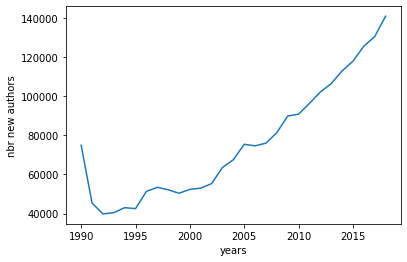

In [8]:
print(newAuthorPerYear)

x= 0
for k in newAuthorPerYear:
    x += newAuthorPerYear[k]
print(x)

abs=[]
ord=[]
for k in newAuthorPerYear.keys():
    abs.append(k)
    ord.append(newAuthorPerYear[k])
    

    
plt.clf()
plt.plot(abs,ord)
plt.xlabel('years')
plt.ylabel('nbr new authors')
plt.show()    
    

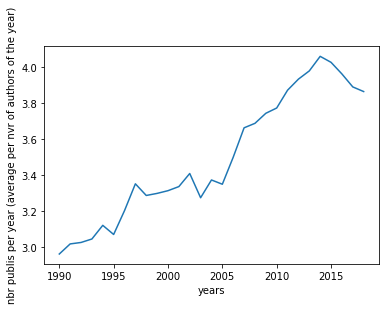

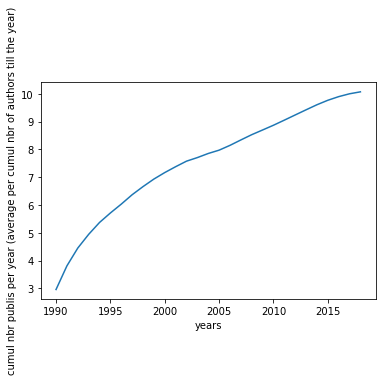

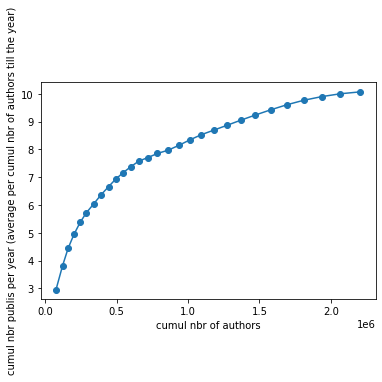

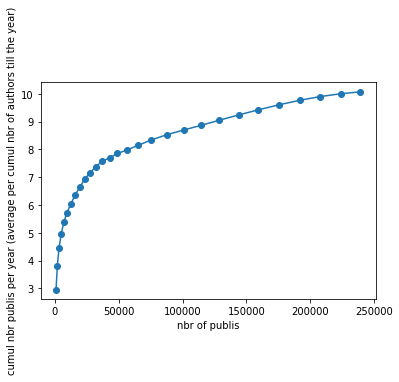

In [88]:
allAuthors_publi = dict()
allAuthors_nbr = dict()

for k in d:
    for year in range(1990,2019):
        if year in allAuthors_publi:
            allAuthors_publi[year]+= d[k][str(year)]
            if d[k][str(year)]>0:
                if year in allAuthors_nbr:
                    allAuthors_nbr[year] += 1
                else:
                    allAuthors_nbr[year] = 1
        else:
            allAuthors_publi[year] = d[k][str(year)]
            if d[k][str(year)]>0:
                allAuthors_nbr[year] = 1

ord = []
ordcumul = []
absCumulAuthor = []

cumul = 0
cumulAuthors = 0
for year in range(1990,2019):
    cumul += allAuthors_publi[year]
    cumulAuthors += newAuthorPerYear[year]
    absCumulAuthor.append(cumulAuthors)
    ordcumul.append(cumul/cumulAuthors)
    ord.append(allAuthors_publi[year]/allAuthors_nbr[year])
    
# nber of publis per year from 1990 to 2018    
#l = [851,1022,1329,1664,2037,2362,3155,3447,3886,3574,4237,4371,5263,6028,5764,7090,9035,10368,12213,13213,13926,14084,15009,15498,16350,16137,15637,16269,15595]
        
#abs0 = l[startingYear-1990:startingYear+m-1990+1]
#abs = [abs0[0]]
#for i in range(1,len(abs0)):
#    abs.append(abs[i-1]+abs0[i])
                
abs = range(1990,2019)


#print(abs)
#print(ord)
#print(allAuthors_publi)
#print(allAuthors_nbr)
    

plt.clf()
plt.plot(abs,ord)
plt.xlabel('years')
plt.ylabel('nbr publis per year (average per nvr of authors of the year)')
plt.show() 

plt.clf()
plt.plot(abs,ordcumul)
plt.xlabel('years')
plt.ylabel('cumul nbr publis per year (average per cumul nbr of authors till the year)')
plt.show()

plt.clf()
plt.plot(absCumulAuthor,ordcumul, marker='o', label = 'dots represent the year')
plt.xlabel('cumul nbr of authors')
plt.ylabel('cumul nbr publis per year (average per cumul nbr of authors till the year)')
plt.show()

# nber of publis per year from 1990 to 2018    
l = [851,1022,1329,1664,2037,2362,3155,3447,3886,3574,4237,4371,5263,6028,5764,7090,9035,10368,12213,13213,13926,14084,15009,15498,16350,16137,15637,16269,15595]
        
absPubli = [l[0]]
for i in range(1,29):
    absPubli.append(absPubli[i-1]+l[i])

plt.clf()
plt.plot(absPubli,ordcumul, marker='o', label = 'dots represent the year')
plt.xlabel('nbr of publis')
plt.ylabel('cumul nbr publis per year (average per cumul nbr of authors till the year)')
plt.show()

[0, 19361, 19483, 21172, 23081, 26207, 26492, 31739, 35202, 36383, 36403, 37830, 38478, 39341, 44626, 48393, 55276, 56912, 59330, 65227, 72420, 74921, 83478, 93153, 104105, 118432, 138335, 170273, 226526]
[74974, 101002, 121320, 140587, 160502, 176804, 201644, 223330, 240316, 254311, 270290, 285457, 302321, 326557, 349512, 376586, 396000, 415143, 437270, 462008, 480507, 502022, 520809, 534216, 543158, 542765, 530165, 490511, 405078]


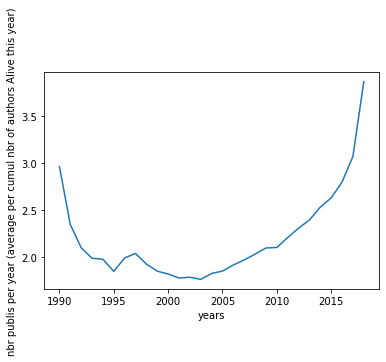

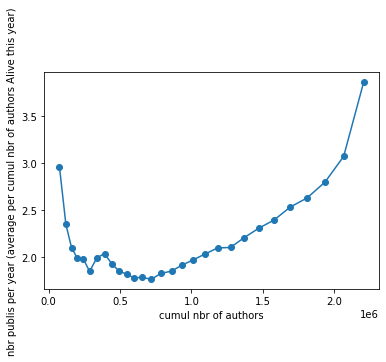

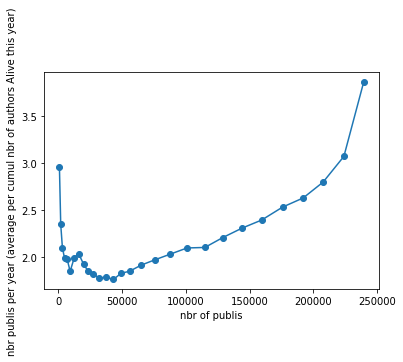

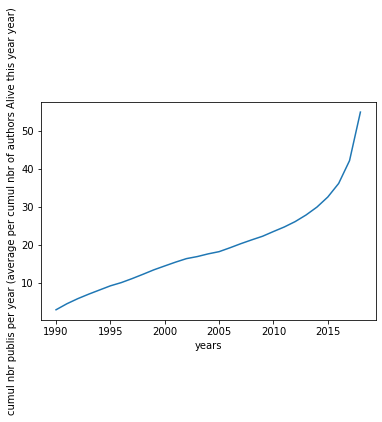

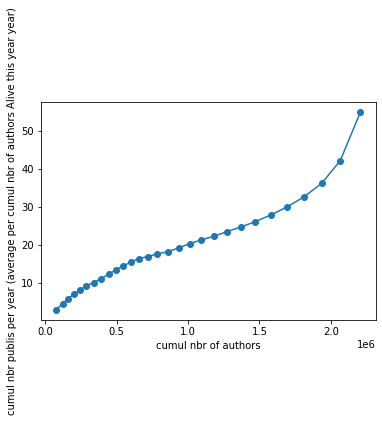

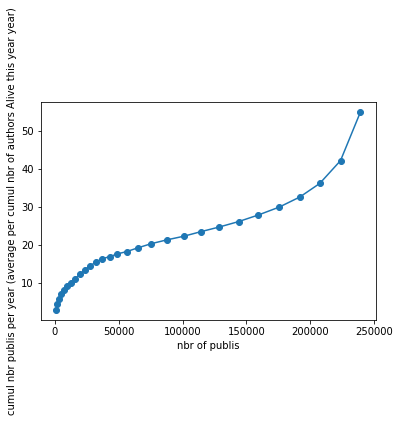

In [89]:
# same as before but normalized by the number of authors alive in a given year

# first, we compute the number of authors alive in a given year
# nbrAliveAuthors[i] = nbr of authors having already published before year 1990+i+1 and still publishing after year 1990+i-1
nbrAliveAuthors = [absCumulAuthor[0]]

# reminder
# absCumulAuthor[i] total number of authors having published till year 1990+i
# refinedStat[longev][i][0] = nbr authors starting in year i and with longevity longev
# said differently refinedStat[longev][i][0] are the number of authors "diseappearing" after year i+longev-1.

# nbrDisappearingAuthors[i] = nbr of authors whose last publi is in year 1990+i-1
nbrDisappearingAuthors = [0 for i in range(0,29)]

for i in range(1,29):
    for j in range(1,i+1):
        if j in refinedStat:
            if i+1990-j in refinedStat[j]:
                nbrDisappearingAuthors[i]= nbrDisappearingAuthors[i]+refinedStat[j][i+1990-j][0]

cumulDisseapeared = 0
for i in range(1,29):
    cumulDisseapeared += nbrDisappearingAuthors[i]
    nbrAliveAuthors.append(absCumulAuthor[i] - cumulDisseapeared)
    
print(nbrDisappearingAuthors)
print(nbrAliveAuthors)

ordAveragePerAlive = []
ordcumulAveragePerAlive = []

cumul = 0
for i in range(0,29):
    cumul += allAuthors_publi[1990+i]
    ordAveragePerAlive.append(allAuthors_publi[1990+i]/nbrAliveAuthors[i])
    ordcumulAveragePerAlive.append(cumul/nbrAliveAuthors[i]) 
    
plt.clf()
plt.plot(abs,ordAveragePerAlive)
plt.xlabel('years')
plt.ylabel('nbr publis per year (average per cumul nbr of authors Alive this year)')
plt.show()

plt.clf()
plt.plot(absCumulAuthor,ordAveragePerAlive, marker='o', label = 'dots represent the year')
plt.xlabel('cumul nbr of authors')
plt.ylabel('nbr publis per year (average per cumul nbr of authors Alive this year)')
plt.show()

plt.clf()
plt.plot(absPubli,ordAveragePerAlive, marker='o', label = 'dots represent the year')
plt.xlabel('nbr of publis')
plt.ylabel('nbr publis per year (average per cumul nbr of authors Alive this year)')
plt.show()

####

plt.clf()
plt.plot(abs,ordcumulAveragePerAlive)
plt.xlabel('years')
plt.ylabel('cumul nbr publis per year (average per cumul nbr of authors Alive this year year)')
plt.show()

plt.clf()
plt.plot(absCumulAuthor,ordcumulAveragePerAlive, marker='o', label = 'dots represent the year')
plt.xlabel('cumul nbr of authors')
plt.ylabel('cumul nbr publis per year (average per cumul nbr of authors Alive this year year)')
plt.show()

plt.clf()
plt.plot(absPubli,ordcumulAveragePerAlive, marker='o', label = 'dots represent the year')
plt.xlabel('nbr of publis')
plt.ylabel('cumul nbr publis per year (average per cumul nbr of authors Alive this year year)')
plt.show()


#########
nbrAuthorsPerLongevityAndStartingYear
#########
years\longevity  :1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
#########
1990 :19361,2640,2311,1983,1862,1541,1601,1464,1541,1446,1328,1289,1246,1251,1360,1339,1315,1250,1339,1428,1293,1319,1445,1492,1600,1795,2349,3592,11194,
1991 :16843,1816,1623,1454,1162,1089,972,929,808,775,668,605,668,650,666,596,629,632,686,622,663,664,754,775,882,1216,1677,4865,
1992 :17045,1576,1428,1181,1075,918,772,721,660,545,538,521,519,534,475,478,552,490,516,530,525,572,680,719,926,1352,3953,
1993 :17899,1707,1516,1393,1154,940,807,685,577,495,540,500,501,497,501,558,472,478,481,553,558,648,730,905,1334,4010,
1994 :19756,1810,1647,1429,1292,1003,835,732,606,542,552,566,528,487,507,476,502,513,531,583,683,778,922,1550,4166,
1995 :19282,1971,1781,1468,1208,953,804,644,556,598,573,564,546,543,530,486,510,547,604,656,776,1078,1550,4281,
1996 :22963,2354,2140,1717,1451,1114,965,867,812,734,732,680,654,666,687,669,709,78

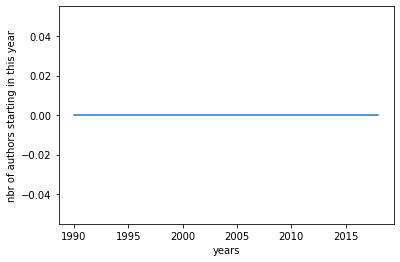

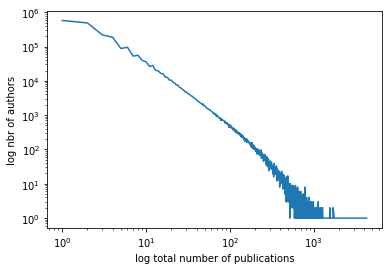

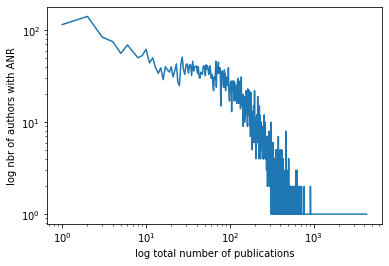

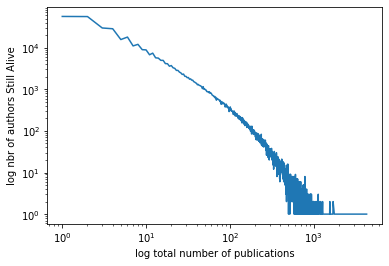

In [90]:
###########################################################
###########################################################
# SOME COUNTING TESTS (AND GENERAL PLOTS)
###########################################################
###########################################################
totalNbrAuthorsTest = 0
# nbrAuthorsPerLongevityAndStartingYear[i][j] : nbr of authors with longevity i starting in year j
nbrAuthorsPerLongevityAndStartingYear = dict()


for longev in refinedStat.keys():
    for startYear in refinedStat[longev].keys():
        if not(startYear in nbrAuthorsPerLongevityAndStartingYear.keys()):
            nbrAuthorsPerLongevityAndStartingYear[startYear] = dict()
        totalNbrAuthorsTest += refinedStat[longev][startYear][0]
        nbrAuthorsPerLongevityAndStartingYear[startYear][longev] = refinedStat[longev][startYear][0]

# print de nbrAuthorsPerLongevityAndStartingYear
print('#########')
print('nbrAuthorsPerLongevityAndStartingYear') 
print('#########')
print('years\longevity  :',end='')
for i in range(1,29):
    print(str(i)+',',end='')
print(str(29))
print('#########')
for year in range(1990,2019):
    print(str(year)+' :',end='')
    for longev in range(1,2019-year+1):
        if (year in nbrAuthorsPerLongevityAndStartingYear.keys()) and (longev in nbrAuthorsPerLongevityAndStartingYear[year].keys()):
            print(str(nbrAuthorsPerLongevityAndStartingYear[year][longev])+',',end='')
        else:
            print(str(0)+',',end='')
    print()

print()
print('#########')
#print(nbrAuthorsPerLongevityAndStartingYear)

print('TEST : nbr total authors in refinedStat = {}'.format(totalNbrAuthorsTest))
print('it should be 2207657')


############# CASE of authors with ANR
totalNbrAuthorsANRTest = 0
# nbrAuthorsANRPerLongevityAndStartingYear[i][j] : nbr of authors with longevity i starting in year j
nbrAuthorsANRPerLongevityAndStartingYear = dict()

for longev in refinedStatANR.keys():
    for startYear in refinedStatANR[longev].keys():
        if not(startYear in nbrAuthorsANRPerLongevityAndStartingYear.keys()):
            nbrAuthorsANRPerLongevityAndStartingYear[startYear] = dict()
        totalNbrAuthorsANRTest += refinedStatANR[longev][startYear][0]
        nbrAuthorsANRPerLongevityAndStartingYear[startYear][longev] = refinedStatANR[longev][startYear][0]

        
# print de nbrAuthorsANRPerLongevityAndStartingYear
print('#########')
print('nbrAuthorsANRPerLongevityAndStartingYear') 
print('#########')
print('years\longevity  :',end='')
for i in range(1,29):
    print(str(i)+',',end='')
print(str(29))
print('#########')
for year in range(1990,2019):
    print(str(year)+' :',end='')
    for longev in range(1,2019-year+1):
        if (year in nbrAuthorsANRPerLongevityAndStartingYear.keys()) and (longev in nbrAuthorsANRPerLongevityAndStartingYear[year].keys()):
            print(str(nbrAuthorsANRPerLongevityAndStartingYear[year][longev])+',',end='')
        else:
            print(str(0)+',',end='')
    print()

print()
print('#########')
#print(nbrAuthorsANRPerLongevityAndStartingYear)
print('TEST : nbr total authors ANR in refinedStatANR = {}'.format(totalNbrAuthorsANRTest))
print('it should be 6807')

############# SOME DATA ANALYSIS / REMARK ############
# Note that we have data from 1990 so all authors that have a publication in 1990 are supposed to start in 1990. Similarly, an author who published for the first time (in our data) in 1994 is counted as first publisher in 1994 while he could have published previously before 1990. This explain the decrease of the curves between 1990 and few years later...
############# /SOME DATA ANALYSIS / REMARK ############
yearsAll = range(1990,2019)
totalStartingAuthors = [0 for i in range(29)]

for longev in range(30):
     if longev in nbrAuthorsPerLongevityAndStartingYear.keys():
        #print('longevity = {}'.format(longev))
        years = range(1990,2019-(longev-1))
        # ordinates[j] nbr of authors with longetivity "longev" starting in year j
        ordinates = []
        for year in years:
            if year in nbrAuthorsPerLongevityAndStartingYear[longev].keys():
                ordinates.append(nbrAuthorsPerLongevityAndStartingYear[longev][year])
                totalStartingAuthors[year-1990] += nbrAuthorsPerLongevityAndStartingYear[longev][year]
            else:
                ordinates.append(0)
        plt.clf()
        plt.plot(years,ordinates)
        plt.xlabel('years')
        plt.ylabel('nbr of authors with longevity exactly {} starting each year'.format(longev))
        plt.show()
        #plt.savefig(PATH+'nbr_authors_withLongevityExactly'+str(longev)+' per year.png')
        
        #logOrdinates = []
        #for i in ordinates:
        #    logOrdinates.append(math.log(i))
        #plt.clf()
        #plt.plot(years,logOrdinates)
        #plt.xlabel('years')
        #plt.ylabel('log of nbr of authors with longevity exactly {} starting each year'.format(longev))
        #plt.show()           
        
 
plt.clf()
plt.plot(yearsAll,totalStartingAuthors)
plt.xlabel('years')
plt.ylabel('nbr of authors starting in this year')
plt.show()
#plt.savefig(PATH+'nbr_authors_starting_each_year.png')

#logTotalStartingAuthors = []
#for i in totalStartingAuthors:
#    logTotalStartingAuthors.append(math.log(i))
#plt.clf()
#plt.plot(yearsAll,logTotalStartingAuthors)
#plt.xlabel('years')
#plt.ylabel('log of nbr of authors starting in this year')
#plt.show()


############################################################
############################################################
#           NBR PUBLICATIONS DISTRIBUTION
############################################################
############################################################

plt.clf()
myList = distribNbrPublicationPerAuthors.items()
myList = sorted(myList)
x, y = zip(*myList)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, y)
plt.xlabel('log total number of publications')
plt.ylabel('log nbr of authors')
plt.show()
#plt.savefig(PATH+'distribPublis.png')

plt.clf()
myList = distribNbrPublicationPerAuthorsANR.items()
myList = sorted(myList)
x, y = zip(*myList)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, y)
plt.xlabel('log total number of publications')
plt.ylabel('log nbr of authors with ANR')
plt.show()




############################################################
############################################################
#           NBR PUBLICATIONS DISTRIBUTION FOR AUTHORS STILL ALIVE
############################################################
############################################################



plt.clf()
myList = distribNbrPublicationPerAuthorsStillAlive.items()
myList = sorted(myList)
x, y = zip(*myList)
plt.yscale('log')
plt.xscale('log')
plt.plot(x, y)
plt.xlabel('log total number of publications')
plt.ylabel('log nbr of authors Still Alive')
plt.show()
#plt.savefig(PATH+'distribPublisStillAlive.png')





test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 1 and starting year 2018
################################


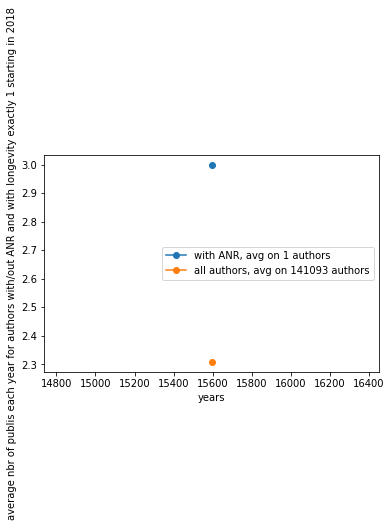

################################
authors with/out ANR and with longevity 1 and starting year 2018, cumulative publis
################################


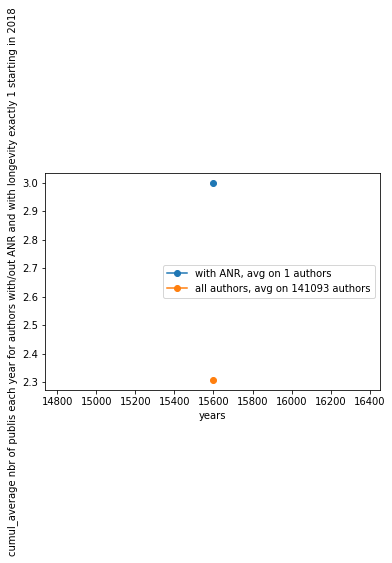

test
True
fin test
################################
authors with longevity 2 and starting year 2017
################################


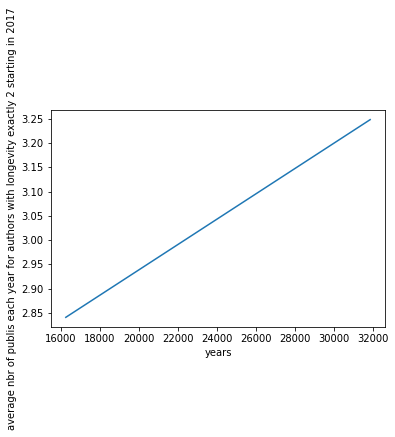

################################
authors with longevity 2 and starting year 2017, cumulative publis
################################


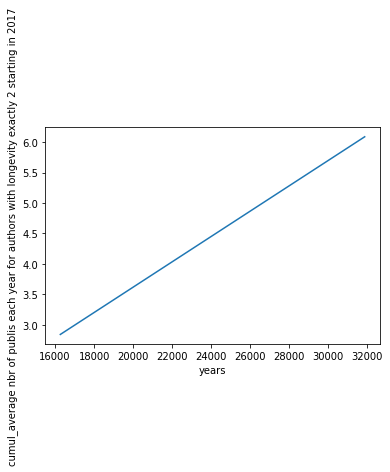

test
True
fin test
################################
authors with longevity 3 and starting year 2016
################################


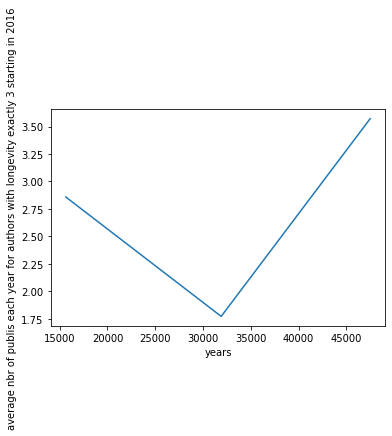

################################
authors with longevity 3 and starting year 2016, cumulative publis
################################


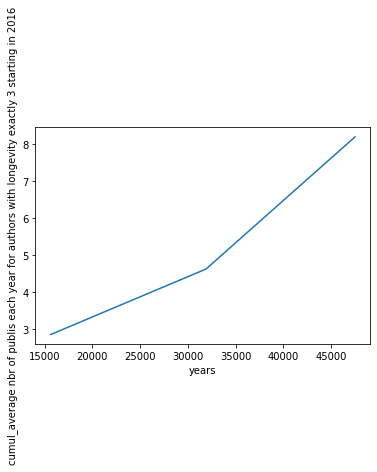

test
True
fin test
################################
authors with longevity 4 and starting year 2015
################################


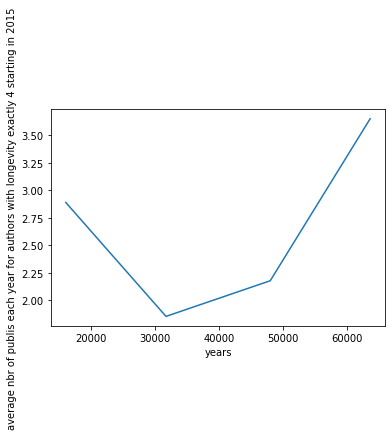

################################
authors with longevity 4 and starting year 2015, cumulative publis
################################


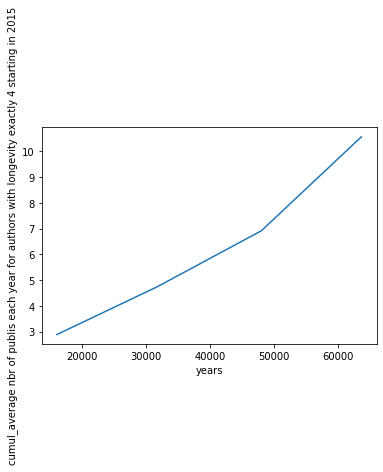

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 5 and starting year 2014
################################


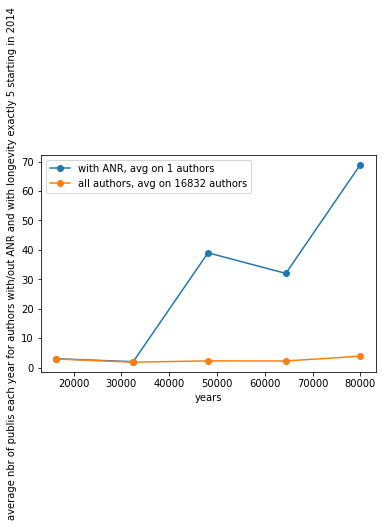

################################
authors with/out ANR and with longevity 5 and starting year 2014, cumulative publis
################################


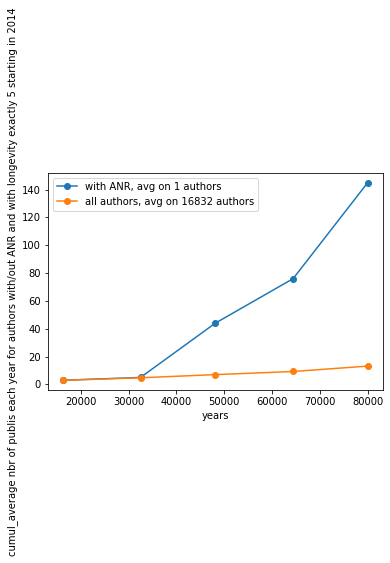

test
True
fin test
################################
authors with longevity 6 and starting year 2013
################################


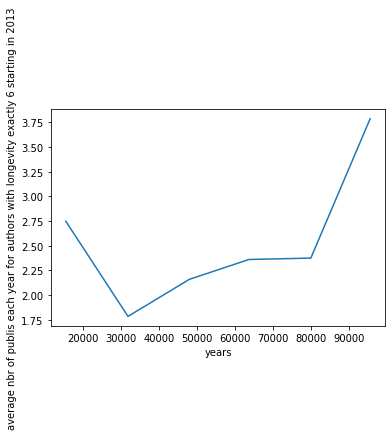

################################
authors with longevity 6 and starting year 2013, cumulative publis
################################


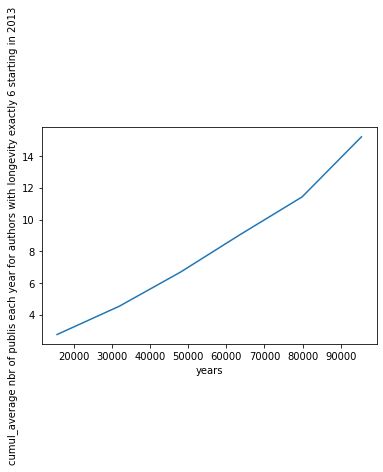

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 7 and starting year 2012
################################


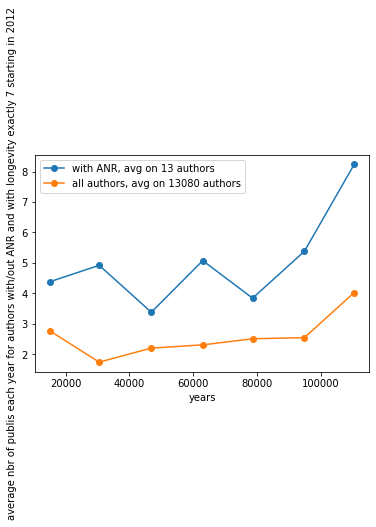

################################
authors with/out ANR and with longevity 7 and starting year 2012, cumulative publis
################################


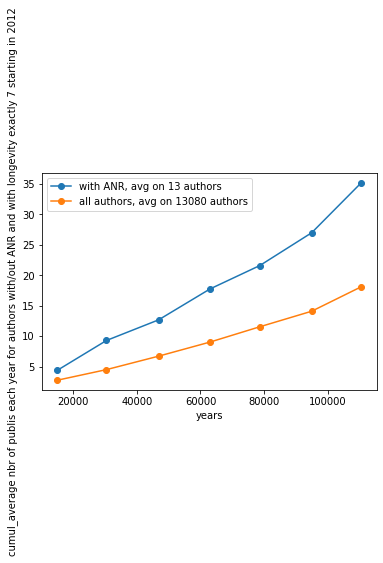

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 8 and starting year 2011
################################


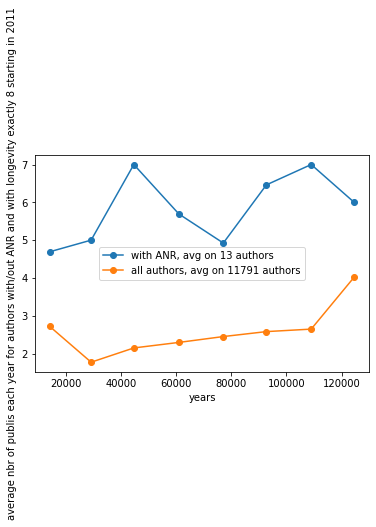

################################
authors with/out ANR and with longevity 8 and starting year 2011, cumulative publis
################################


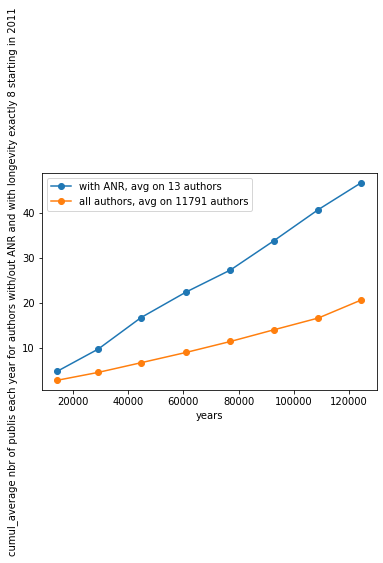

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 9 and starting year 2010
################################


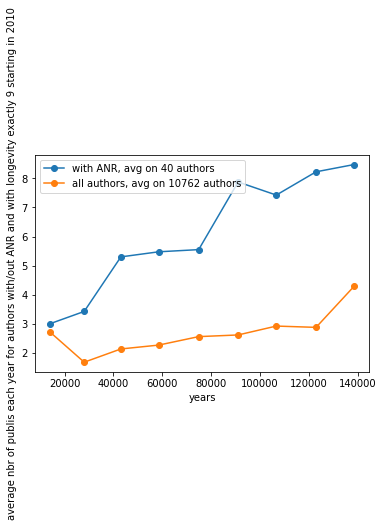

################################
authors with/out ANR and with longevity 9 and starting year 2010, cumulative publis
################################


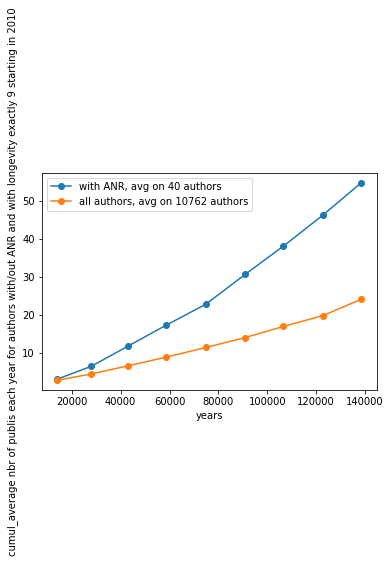

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 10 and starting year 2009
################################


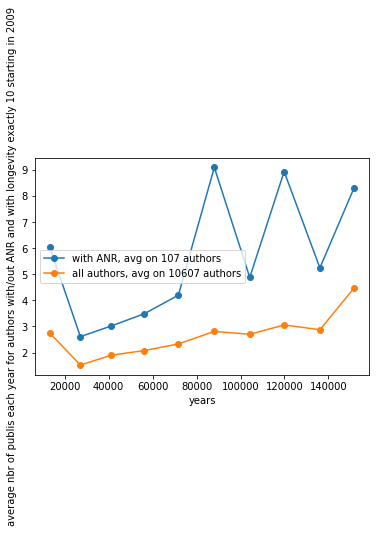

################################
authors with/out ANR and with longevity 10 and starting year 2009, cumulative publis
################################


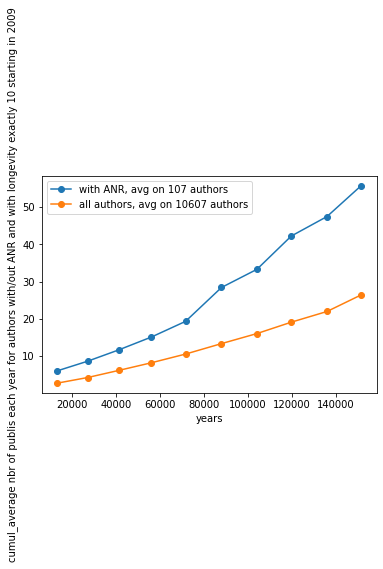

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 11 and starting year 2008
################################


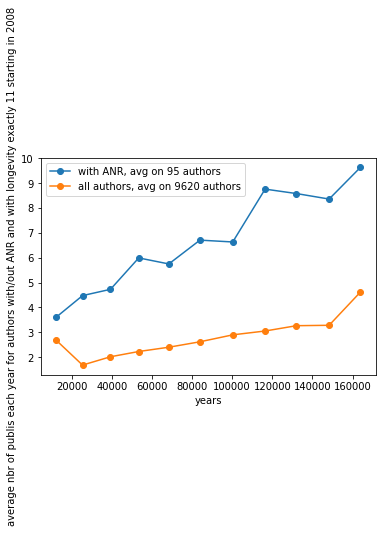

################################
authors with/out ANR and with longevity 11 and starting year 2008, cumulative publis
################################


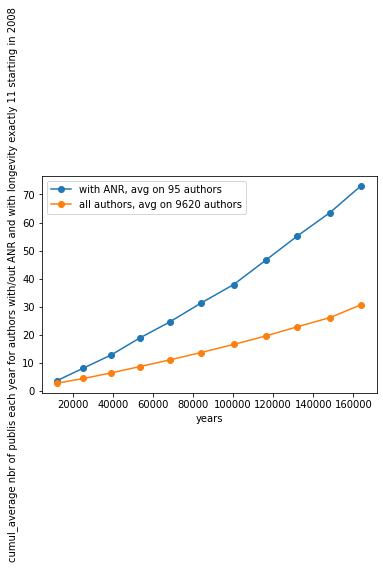

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 12 and starting year 2007
################################


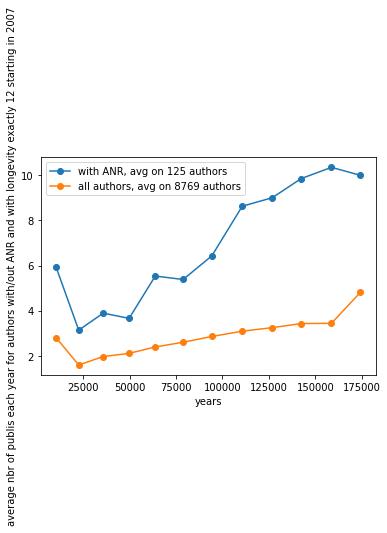

################################
authors with/out ANR and with longevity 12 and starting year 2007, cumulative publis
################################


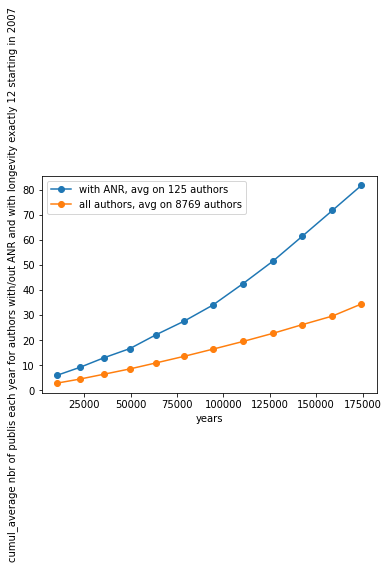

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 13 and starting year 2006
################################


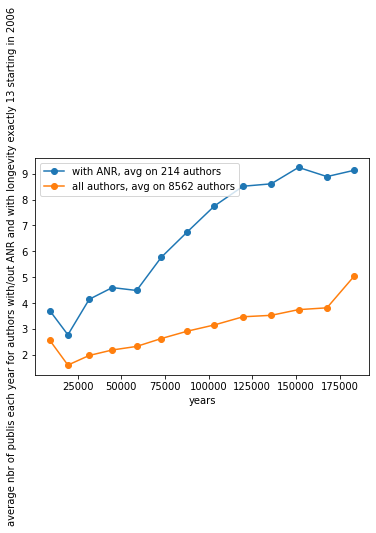

################################
authors with/out ANR and with longevity 13 and starting year 2006, cumulative publis
################################


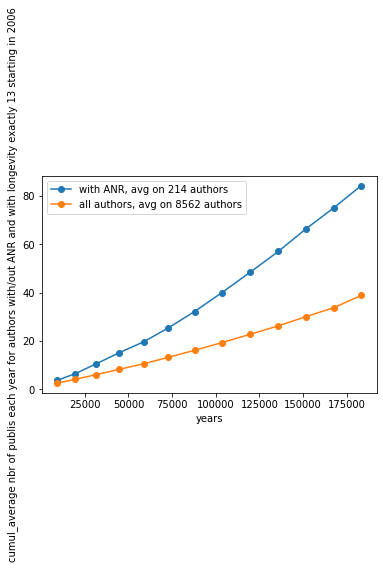

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 14 and starting year 2005
################################


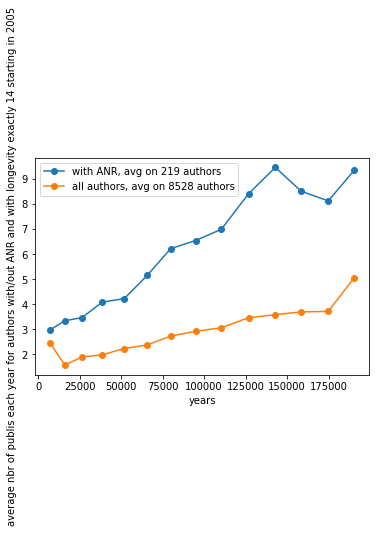

################################
authors with/out ANR and with longevity 14 and starting year 2005, cumulative publis
################################


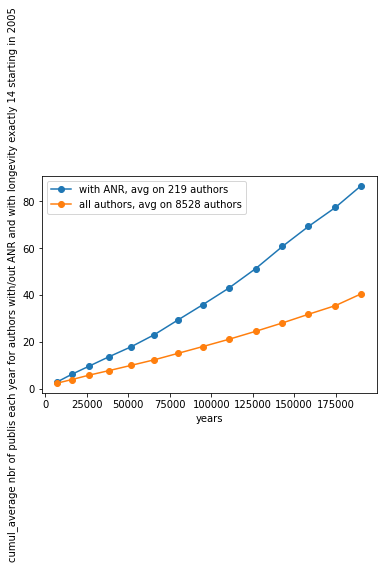

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 15 and starting year 2004
################################


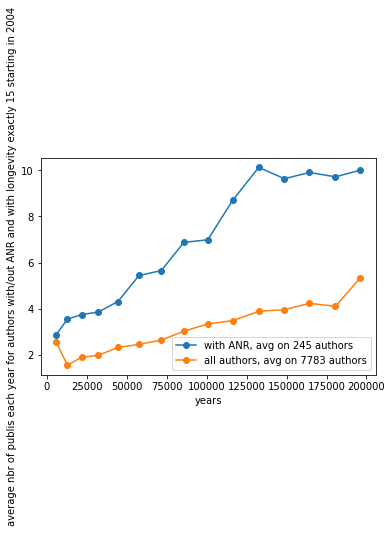

################################
authors with/out ANR and with longevity 15 and starting year 2004, cumulative publis
################################


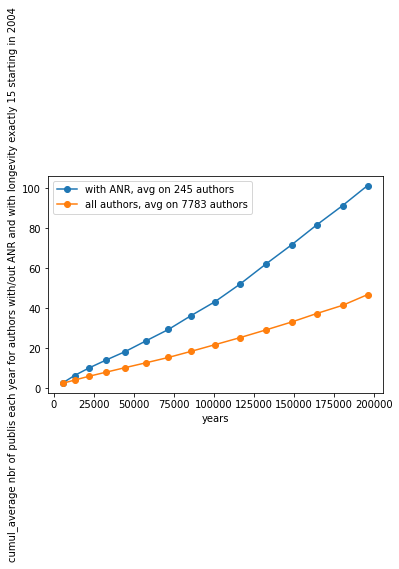

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 16 and starting year 2003
################################


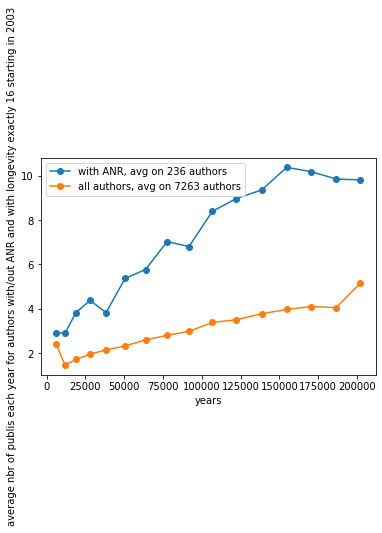

################################
authors with/out ANR and with longevity 16 and starting year 2003, cumulative publis
################################


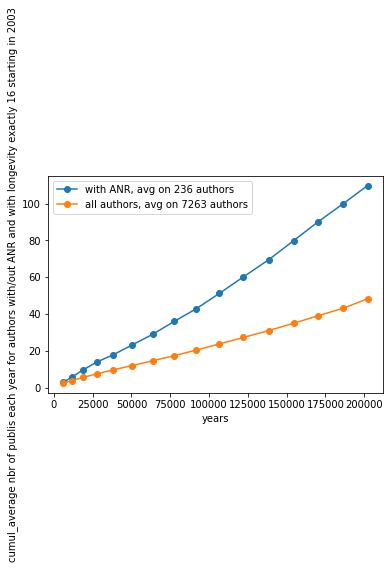

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 17 and starting year 2002
################################


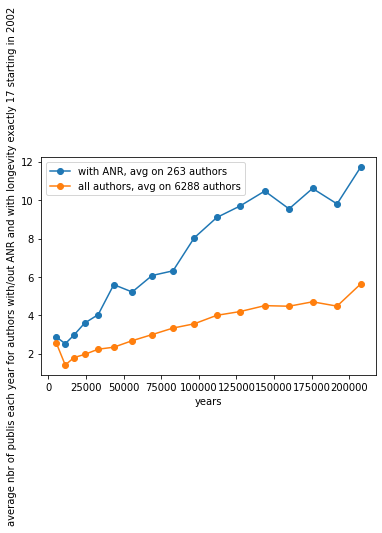

################################
authors with/out ANR and with longevity 17 and starting year 2002, cumulative publis
################################


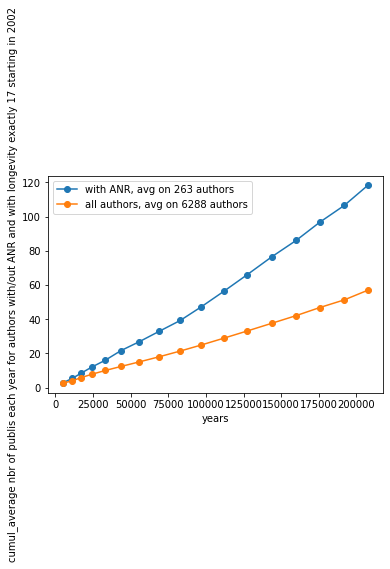

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 18 and starting year 2001
################################


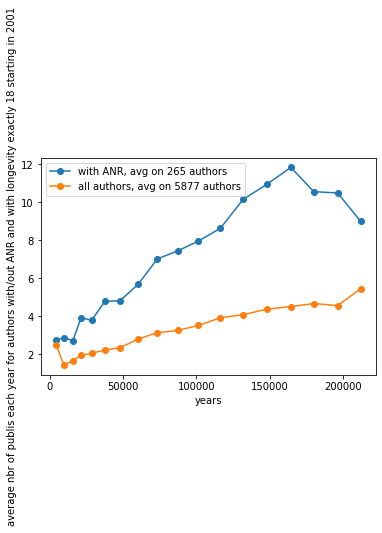

################################
authors with/out ANR and with longevity 18 and starting year 2001, cumulative publis
################################


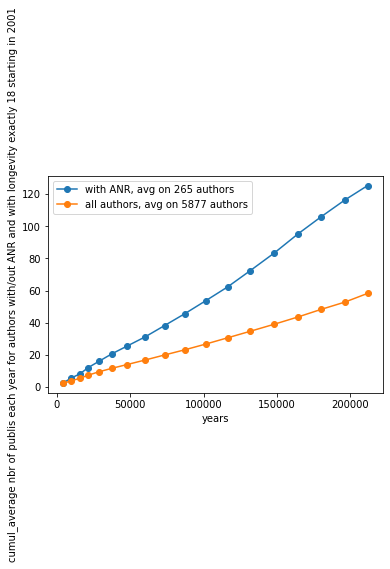

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 19 and starting year 2000
################################


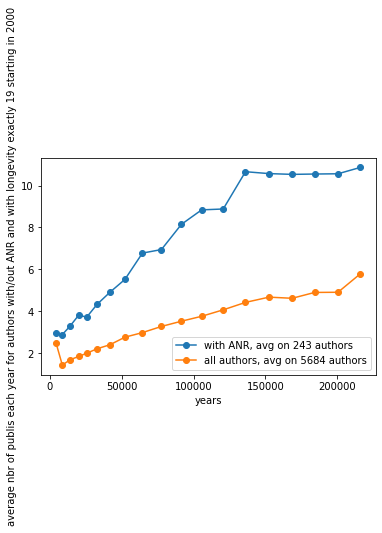

################################
authors with/out ANR and with longevity 19 and starting year 2000, cumulative publis
################################


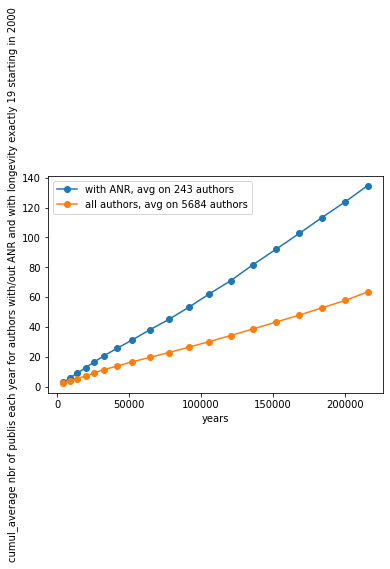

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 20 and starting year 1999
################################


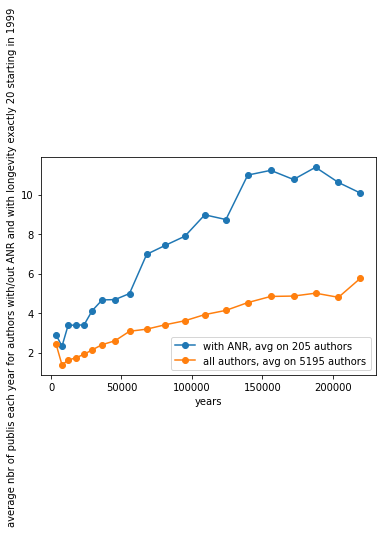

################################
authors with/out ANR and with longevity 20 and starting year 1999, cumulative publis
################################


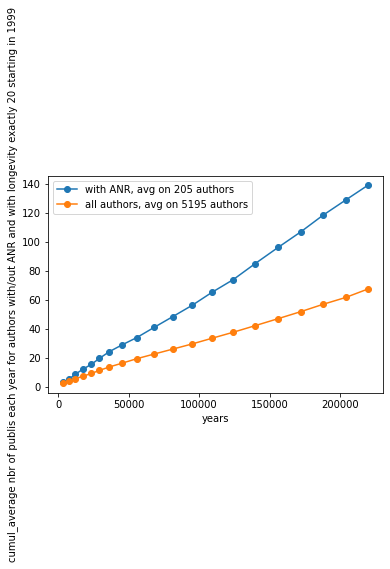

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 21 and starting year 1998
################################


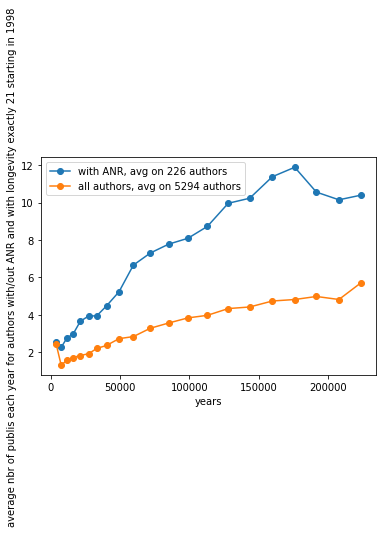

################################
authors with/out ANR and with longevity 21 and starting year 1998, cumulative publis
################################


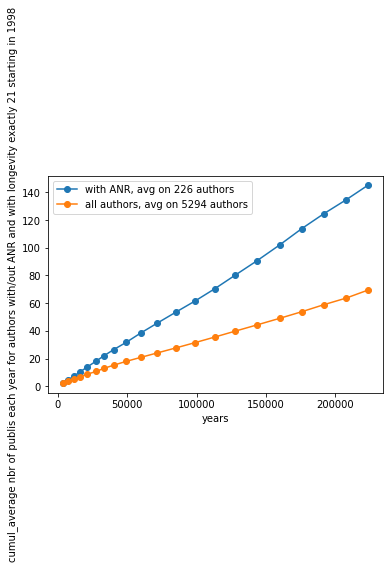

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 22 and starting year 1997
################################


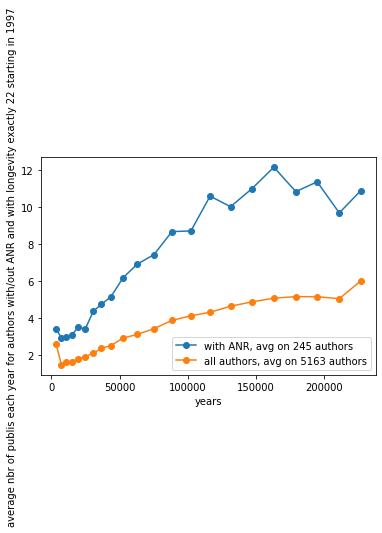

################################
authors with/out ANR and with longevity 22 and starting year 1997, cumulative publis
################################


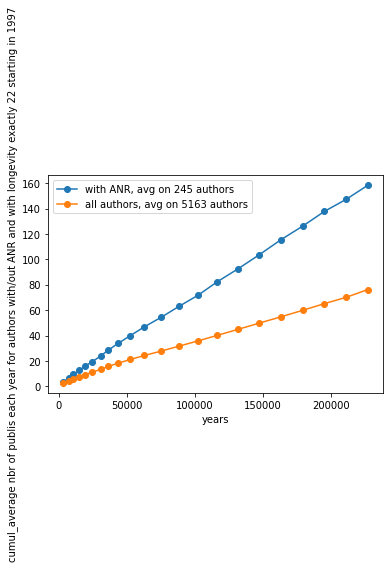

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 23 and starting year 1996
################################


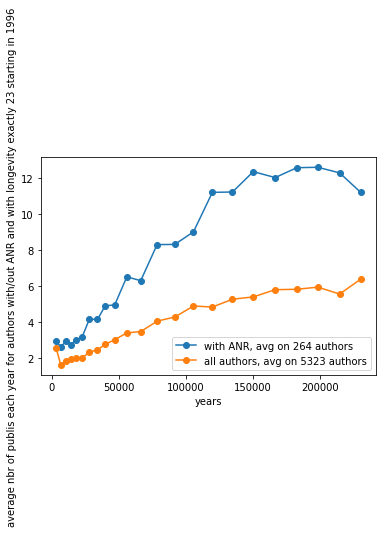

################################
authors with/out ANR and with longevity 23 and starting year 1996, cumulative publis
################################


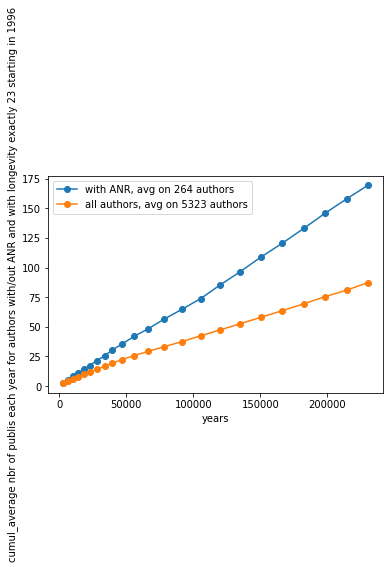

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 24 and starting year 1995
################################


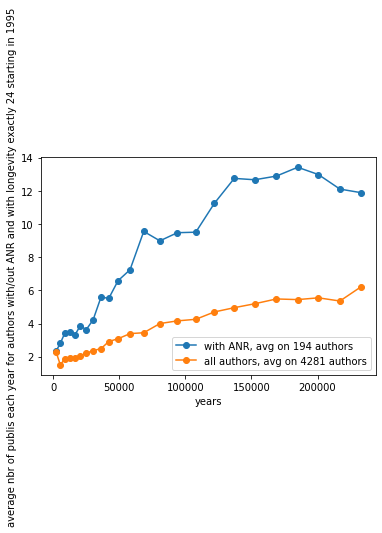

################################
authors with/out ANR and with longevity 24 and starting year 1995, cumulative publis
################################


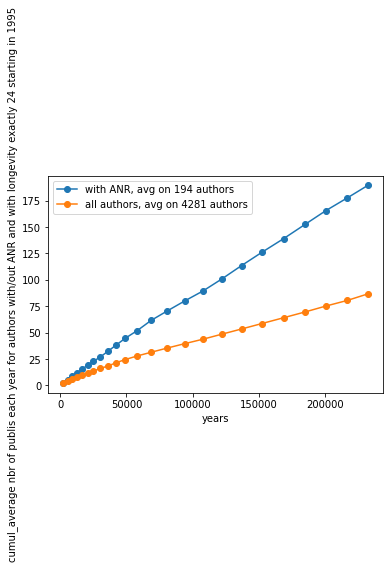

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 25 and starting year 1994
################################


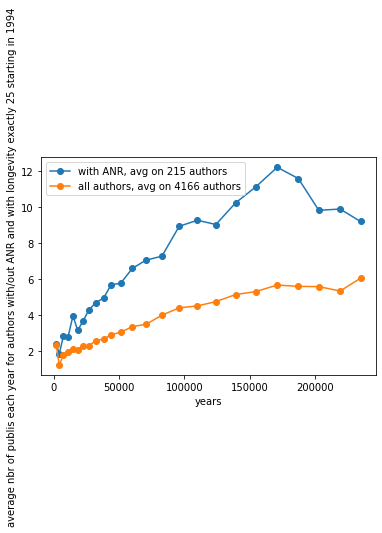

################################
authors with/out ANR and with longevity 25 and starting year 1994, cumulative publis
################################


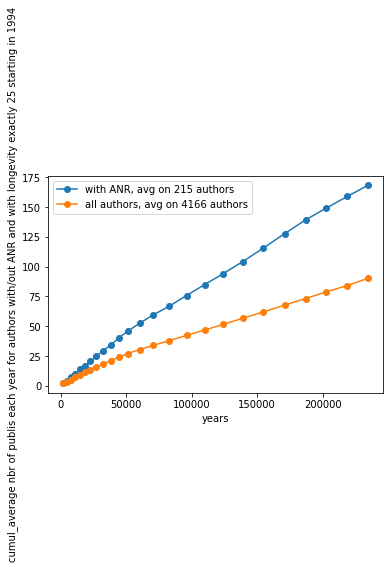

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 26 and starting year 1993
################################


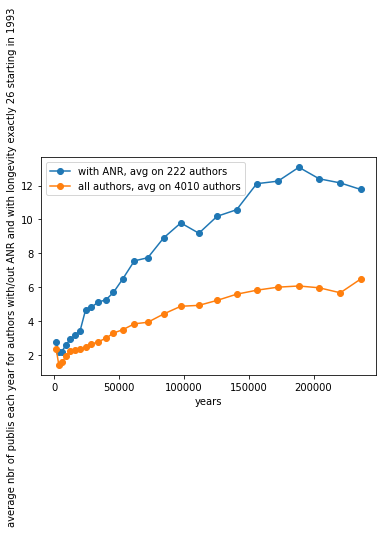

################################
authors with/out ANR and with longevity 26 and starting year 1993, cumulative publis
################################


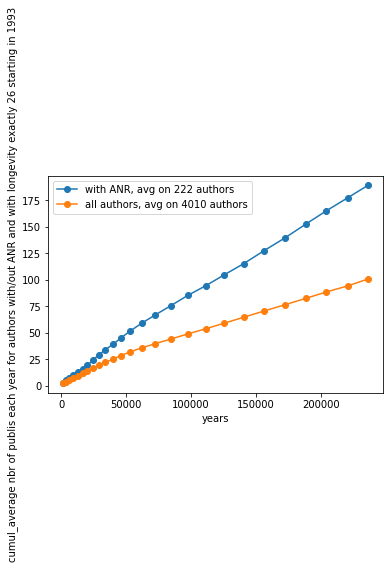

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 27 and starting year 1992
################################


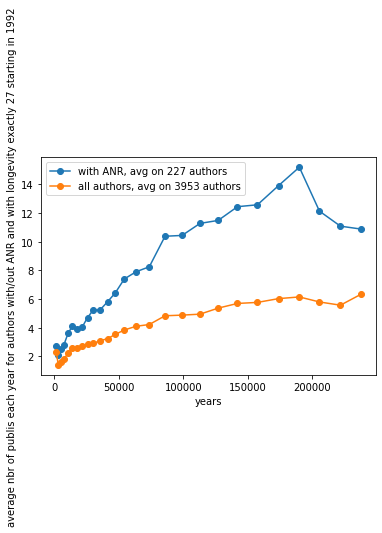

################################
authors with/out ANR and with longevity 27 and starting year 1992, cumulative publis
################################


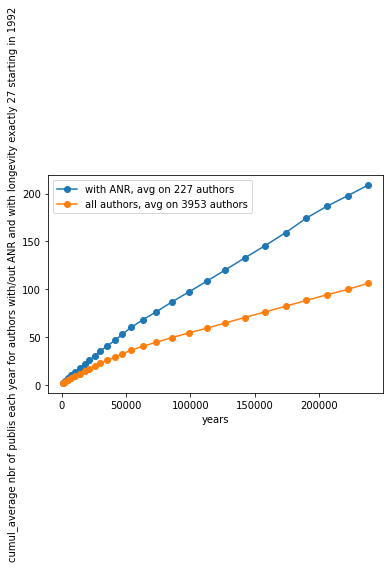

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 28 and starting year 1991
################################


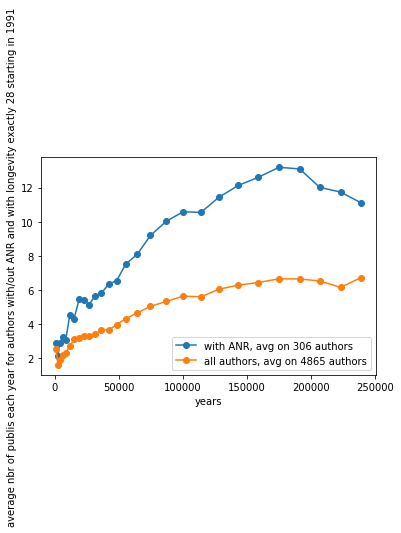

################################
authors with/out ANR and with longevity 28 and starting year 1991, cumulative publis
################################


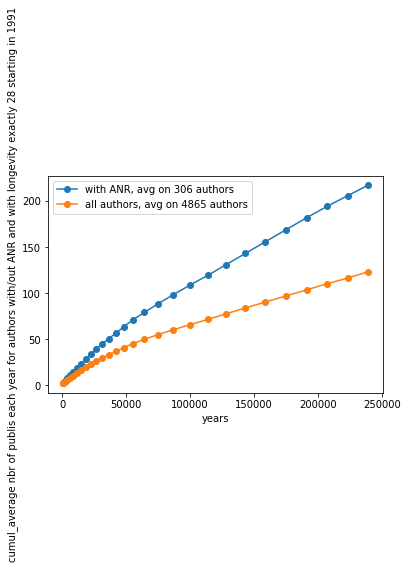

test
True
fin test
coucou
test2
True
fin test2
################################
authors with/out ANR and with longevity 29 and starting year 1990
################################


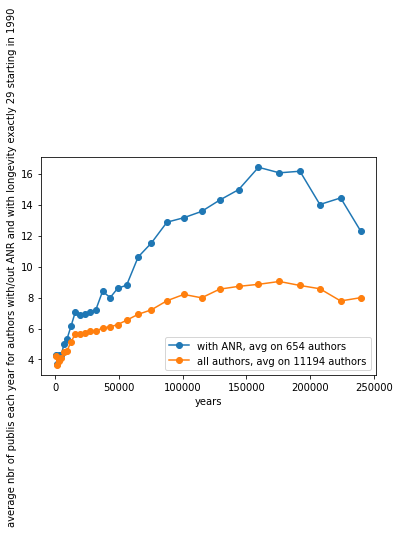

################################
authors with/out ANR and with longevity 29 and starting year 1990, cumulative publis
################################


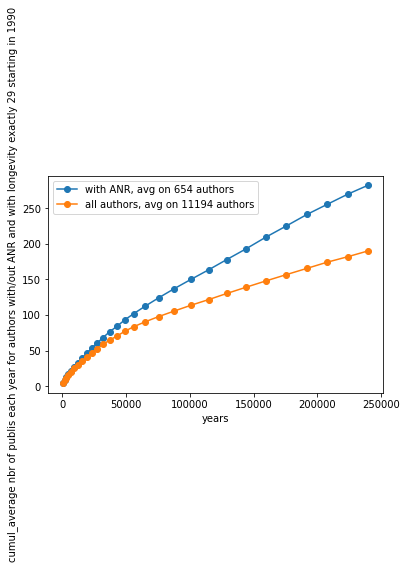

In [91]:
###########################################################
# PLOTS OF THE MAIN STATS
###########################################################

# if you want to check a pair of couple (longev, startingYear) defined by two lists each
# decomment the AA lines 
# and comment the BB lines (especially the "nico = False" at the end)

#AA 
#longevityRange = [5,10,15,20,29]
#AA 
#startingYearRange = [1991,1995,2000,2005,2010,2013]

# if you want to check a pair of couple (longev, startingYear) defined by one list of couples, 
# comment the AA lines 
# decomment the BB lines (especially the "nico = False" at the end)
#BB
coupleToBeChecked = []
#BB
for i in range(1,30):
#BB
    coupleToBeChecked.append((2019-i,i))

#AA
#for longev in longevityRange:
#AA
#    for startingYear in startingYearRange:
#BB
nico = True
#BB
while nico:
#BB
    for (startingYear,longev) in coupleToBeChecked:
        if startingYear in refinedStat[longev].keys():
            
            #print('################################')
            #print('all authors with longevity {} and starting year {}'.format(longev,startingYear))
            #print('################################')
            n = refinedStat[longev][startingYear][0]
            x = refinedStat[longev][startingYear][1]
            m =len(x)
            ## test ##
            print('test')
            print(m==longev)
            print('fin test')
            
        
            average = [x[0]/n]
            #cumul = [x[0]]
            cumulAverage = [x[0]/n]
        
            for i in range(1,m):
                average.append(x[i]/n)
                #cumul.append(cumul[i-1]+x[i])
                cumulAverage.append(cumulAverage[i-1]+(x[i]/n))
                
            # nber of publis per year from 1990 to 2018    
            l = [851,1022,1329,1664,2037,2362,3155,3447,3886,3574,4237,4371,5263,6028,5764,7090,9035,10368,12213,13213,13926,14084,15009,15498,16350,16137,15637,16269,15595]
        
            abs0 = l[startingYear-1990:startingYear+m-1990+1]
            abs = [abs0[0]]
            for i in range(1,len(abs0)):
                abs.append(abs[i-1]+abs0[i])
                
            #abs = range(startingYear,startingYear+m)
            
            if longev in refinedStatANR.keys():
                if startingYear in refinedStatANR[longev].keys():
                    print("coucou")
                
                    n = refinedStatANR[longev][startingYear][0]
                    x = refinedStatANR[longev][startingYear][1]
                    m =len(x)
                    ## test ##
                    print('test2')
                    print(m==longev)
                    print('fin test2')
        
                    averageANR = [x[0]/n]
                    #cumulANR = [x[0]]
                    cumulAverageANR = [x[0]/n]
        
                    for i in range(1,m):
                        averageANR.append(x[i]/n)
                        #cumul.append(cumul[i-1]+x[i])
                        cumulAverageANR.append(cumulAverageANR[i-1]+(x[i]/n))
        
                    #abs = range(startingYear,startingYear+m)
        
                    print('################################')
                    print('authors with/out ANR and with longevity {} and starting year {}'.format(longev,startingYear))
                    print('################################')
                    
                    plt.clf()
                    plt.plot(abs,averageANR, marker='o', label = 'with ANR, avg on {} authors'.format(nbrAuthorsANRPerLongevityAndStartingYear[startingYear][longev]))
                    plt.legend()
                    plt.plot(abs,average, marker='o', label = 'all authors, avg on {} authors'.format(nbrAuthorsPerLongevityAndStartingYear[startingYear][longev]))
                    plt.legend()
                    plt.xlabel('years')
                    plt.ylabel('average nbr of publis each year for authors with/out ANR and with longevity exactly {} starting in {}'.format(longev,startingYear))
                    #plt.yscale("log")
                    #plt.xscale("log")
                    plt.show()
                    
                    print('################################')
                    print('authors with/out ANR and with longevity {} and starting year {}, cumulative publis'.format(longev,startingYear))
                    print('################################')
        
                    plt.clf()
                    plt.plot(abs,cumulAverageANR, marker='o', label = 'with ANR, avg on {} authors'.format(nbrAuthorsANRPerLongevityAndStartingYear[startingYear][longev]))
                    plt.legend()
                    plt.plot(abs,cumulAverage, marker='o', label = 'all authors, avg on {} authors'.format(nbrAuthorsPerLongevityAndStartingYear[startingYear][longev]))
                    plt.legend()
                    plt.xlabel('years')
                    plt.ylabel('cumul_average nbr of publis each year for authors with/out ANR and with longevity exactly {} starting in {}'.format(longev,startingYear))
                    #plt.yscale("log")
                    #plt.xscale("log")
                    plt.show()
                    
                else:
            
            
                    print('################################')
                    print('authors with longevity {} and starting year {}'.format(longev,startingYear))
                    print('################################')           
            
        
                    plt.clf()
                    plt.plot(abs,average)
                    plt.xlabel('years')
                    plt.ylabel('average nbr of publis each year for authors with longevity exactly {} starting in {}'.format(longev,startingYear))
                    plt.show()
                    #plt.savefig(PATH + 'average_nbr_publis_for_authors_withLongevityExactly'+str(longev)+'starting in '+str(startingYear) +' per year.png')
        
                    print('################################')
                    print('authors with longevity {} and starting year {}, cumulative publis'.format(longev,startingYear))
                    print('################################')
                    plt.clf()
                    plt.plot(abs,cumulAverage)
                    plt.xlabel('years')
                    plt.ylabel('cumul_average nbr of publis each year for authors with longevity exactly {} starting in {}'.format(longev,startingYear))
                    plt.show()
                    #plt.savefig(PATH + 'cumul_average_nbr_publis_for_authors_withLongevityExactly'+str(longev)+'starting in '+str(startingYear) +' per year.png')
                    
            
            
            else:
            
            
                print('################################')
                print('authors with longevity {} and starting year {}'.format(longev,startingYear))
                print('################################')           
            
        
                plt.clf()
                plt.plot(abs,average)
                plt.xlabel('years')
                plt.ylabel('average nbr of publis each year for authors with longevity exactly {} starting in {}'.format(longev,startingYear))
                plt.show()
                #plt.savefig(PATH + 'average_nbr_publis_for_authors_withLongevityExactly'+str(longev)+'starting in '+str(startingYear) +' per year.png')
        
                print('################################')
                print('authors with longevity {} and starting year {}, cumulative publis'.format(longev,startingYear))
                print('################################')
                plt.clf()
                plt.plot(abs,cumulAverage)
                plt.xlabel('years')
                plt.ylabel('cumul_average nbr of publis each year for authors with longevity exactly {} starting in {}'.format(longev,startingYear))
                plt.show()
                #plt.savefig(PATH + 'cumul_average_nbr_publis_for_authors_withLongevityExactly'+str(longev)+'starting in '+str(startingYear) +' per year.png')
      
    #BB
    nico = False
            
            
                
      
            
            
            
            
            
            
            
            
            

In [55]:
############## TEST ############# CF next section for the whole function

PATH2 = '/Users/nnisse/Documents/Encadrement/StagesInvites/SofiiaShelest/Data2/'

# computation of new collaborations through the years
collab1990 = json.load(open(Path(PATH2+'neighbours_1990.json')))

print(len(collab1990))

newCollab90 = dict()

total =0
#maxi = 0
#totalWithRepet = 0

for k in collab1990.keys():
    listCollab = collab1990[k]
    #maxi = max(maxi,len(listCollab))
    #totalWithRepet += len(listCollab) 
    for i in range(0,len(listCollab)):
        if not(listCollab[i] in newCollab90.keys()):
            if k in newCollab90.keys():
                newCollab90[k].append(listCollab[i])
            else:
                newCollab90[k] = [listCollab[i]]
    if k in newCollab90.keys():
        total += len(newCollab90[k])

print(total)
print(newCollab90["7003786915"])
#print(maxi)
#print(totalWithRepet)

1742
2802
['6603564868']


In [81]:
# computation of new collaborations through the years
eventuallyAllCollab = dict()

nbrNewCollabPerYear = []
nbrCumulCollabPerYear = []
last = 0

cumulativeTotal = 0

for year in range(1990,2019):
    
    collabCurrentYear = json.load(open(Path(PATH2+'neighbours_'+str(year)+'.json')))
    for k in collabCurrentYear.keys():
        listCollab = collabCurrentYear[k] 
        for i in range(0,len(listCollab)):
            if not(listCollab[i] in eventuallyAllCollab.keys()):
                if k in eventuallyAllCollab.keys():
                    if not(listCollab[i] in eventuallyAllCollab[k]):
                        eventuallyAllCollab[k].add(listCollab[i])
                        cumulativeTotal +=1
                else:
                    eventuallyAllCollab[k] = set([listCollab[i]])
                    cumulativeTotal +=1
            else:
                if ((not(k in eventuallyAllCollab.keys())) or (not(listCollab[i] in eventuallyAllCollab[k]))):
                    if not(k in eventuallyAllCollab[listCollab[i]]):
                        eventuallyAllCollab[listCollab[i]].add(k)
                        cumulativeTotal +=1
                
                
    nbrNewCollabPerYear.append(cumulativeTotal-last)
    last = cumulativeTotal
    nbrCumulCollabPerYear.append(cumulativeTotal)
    
print(nbrCumulCollabPerYear)
print(nbrNewCollabPerYear)
print(eventuallyAllCollab["7003786915"])

                

[2802, 4983, 8228, 12238, 17176, 23583, 33382, 44185, 60468, 73365, 92232, 111592, 148396, 175323, 217080, 260639, 319866, 376216, 455160, 522545, 623198, 704153, 819198, 917439, 1047249, 1156596, 1323331, 1436938, 1591382]
[2802, 2181, 3245, 4010, 4938, 6407, 9799, 10803, 16283, 12897, 18867, 19360, 36804, 26927, 41757, 43559, 59227, 56350, 78944, 67385, 100653, 80955, 115045, 98241, 129810, 109347, 166735, 113607, 154444]
{'6603564868'}


[2802, 4983, 8228, 12238, 17176, 23583, 33382, 44185, 60468, 73365, 92232, 111592, 148396, 175323, 217080, 260639, 319866, 376216, 455160, 522545, 623198, 704153, 819198, 917439, 1047249, 1156596, 1323331, 1436938, 1591382]
[2802, 2181, 3245, 4010, 4938, 6407, 9799, 10803, 16283, 12897, 18867, 19360, 36804, 26927, 41757, 43559, 59227, 56350, 78944, 67385, 100653, 80955, 115045, 98241, 129810, 109347, 166735, 113607, 154444]
12673


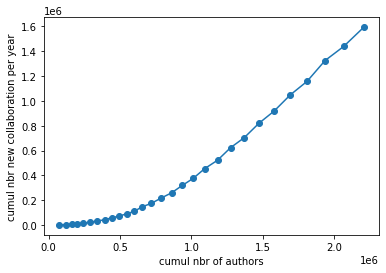

In [99]:
eventuallyAllCollab = set()

knownpeople = set()

numberOfCollabInvolvingTwoNewAuthors = 0

nbrCumulCollabPerYear = []

for year in range(1990,2019):
    
    collabCurrentYear = json.load(open(Path(PATH2+'neighbours_'+str(year)+'.json')))
    for k in collabCurrentYear.keys():
        listCollab = collabCurrentYear[k] 
        for i in range(0,len(listCollab)):
            y = set()
            y.add(k)
            y.add(listCollab[i])
            x = frozenset(y)
            eventuallyAllCollab.add(x)
            if not((k in knownpeople) or (listCollab[i] in knownpeople)):
                numberOfCollabInvolvingTwoNewAuthors +=1
            knownpeople.add(k)
            knownpeople.add(listCollab[i])
                
    nbrCumulCollabPerYear.append(len(eventuallyAllCollab))
    
nbrNewCollabPerYear = [nbrCumulCollabPerYear[0]]
for i in range(1,len(nbrCumulCollabPerYear)):
    nbrNewCollabPerYear.append(nbrCumulCollabPerYear[i]-nbrCumulCollabPerYear[i-1])
    
print(nbrCumulCollabPerYear)
print(nbrNewCollabPerYear)
print(numberOfCollabInvolvingTwoNewAuthors)

plt.clf()
plt.plot(absCumulAuthor,nbrCumulCollabPerYear, marker='o', label = 'dots represent the year')
plt.xlabel('cumul nbr of authors')
plt.ylabel('cumul nbr new collaboration per year')
plt.show()

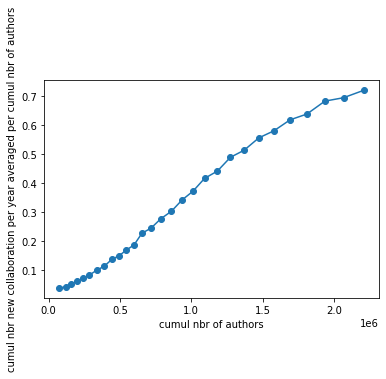

1.3762975708438925
2207657
1591382
239414


In [103]:
nbrCumulCollabPerYearAveraged =[]

for i in range(0,len(nbrCumulCollabPerYear)):
    nbrCumulCollabPerYearAveraged.append(nbrCumulCollabPerYear[i]/absCumulAuthor[i])
    
plt.clf()
plt.plot(absCumulAuthor,nbrCumulCollabPerYearAveraged, marker='o', label = 'dots represent the year')
plt.xlabel('cumul nbr of authors')
plt.ylabel('cumul nbr new collaboration per year averaged per cumul nbr of authors')
plt.show()


a =absCumulAuthor[28]
b =nbrCumulCollabPerYear[28]+12673

print(a/b)
print(absCumulAuthor[28])
print(nbrCumulCollabPerYear[28])

#nber of publis per year from 1990 to 2018    
l = [851,1022,1329,1664,2037,2362,3155,3447,3886,3574,4237,4371,5263,6028,5764,7090,9035,10368,12213,13213,13926,14084,15009,15498,16350,16137,15637,16269,15595]
alpha = 0
for i in range(0,len(l)):
    alpha+= l[i]
    
print(alpha)